# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page [summary](https://docs.google.com/presentation/d/1bdJE_ErhrTySCiGTgpAS-TD9Rs-j_FWYg51PX_DPkYg/edit?usp=sharing&resourcekey=0-ghqcaAkRFeS23YosCCquGA) of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

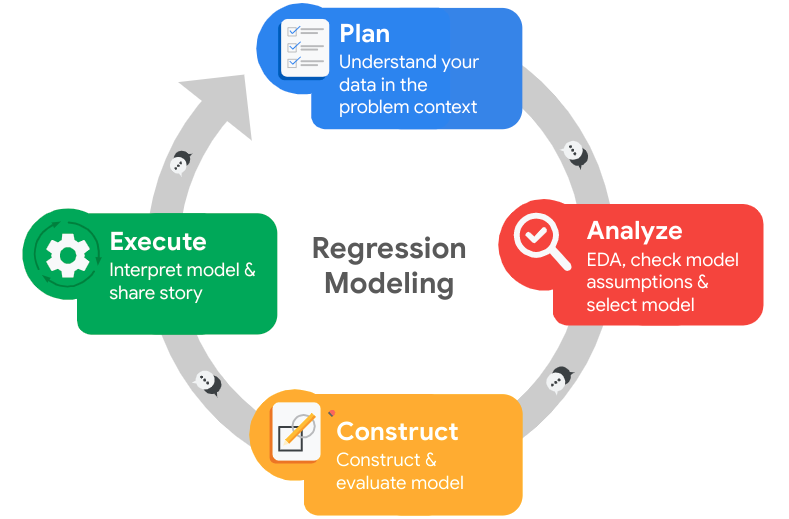



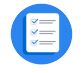

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




* My stockholders are the manegers of the company, clients and anyone may benefit from the services provided by the company.
- I am trying to analyze the reason for the employees departure and the means can the company follow to keep their retention.
- My initial observations were number_project, average_monthly_hours, promotion_last_5years and salary.
- I will use the guidlines that I learned through this course: https://tinyurl.com/yc535be7 / https://tinyurl.com/4fp7nddb
- No

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ###
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={"number_project": "number_of_projects", "Work_accident": "work_accident", "Department": "department"})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df0 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_of_projects     11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [12]:
print(df0["department"].unique())
print(50 * "#")
print(df0["salary"].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
##################################################
['low' 'medium' 'high']


### Check outliers

Check for outliers in the data.

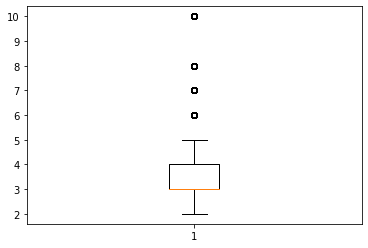

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.boxplot(x="time_spend_company", data=df0);


In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
df_outliers = df0[df0["time_spend_company"] > 5]
len(df_outliers)

824

In [15]:
df0 = df0[df0["time_spend_company"] <= 5]
df0.head()

,satisfaction_level,last_evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

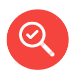
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




* The observations are dependant to each other.
- The data is slightly skewed.
- I renamed some columns to be standard. I also removed rows with outliers not to affect badly on my model.
- EDA purposes before predictinon stage can be to clean your data, removing ouliers, removing null values, etc to make your model suitable and more accurate.
- I used some resources such as https://rb.gy/fqxkrif
- No

## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

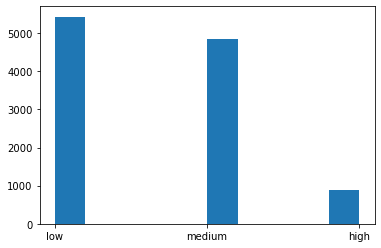

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.hist(df0["salary"]);

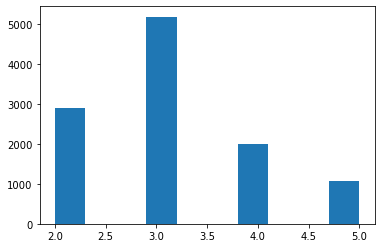

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.hist(df0["time_spend_company"]);

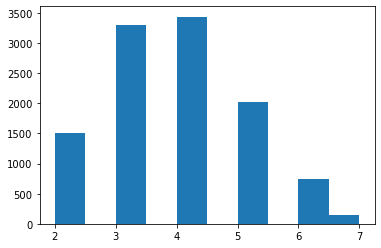

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.hist(df0["number_of_projects"]);

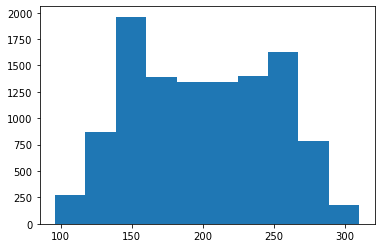

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.hist(df0["average_montly_hours"]);

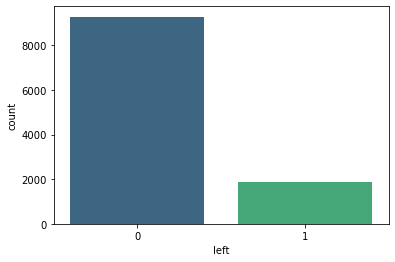

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.countplot(data=df0,x='left',palette='viridis');

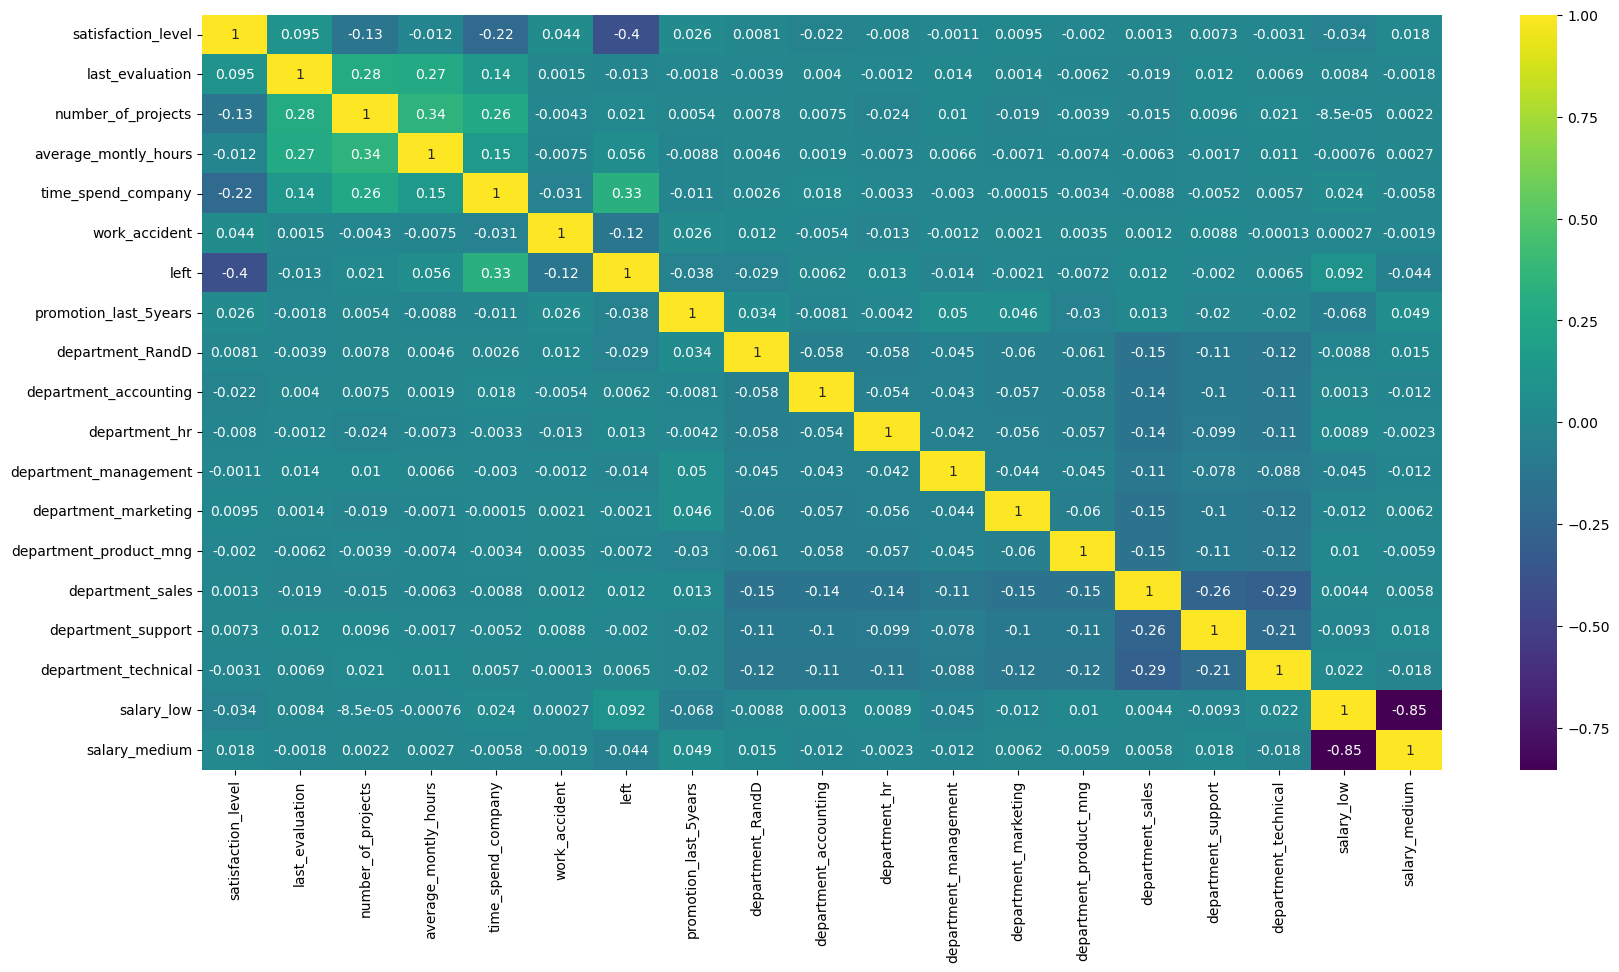

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(20,10),dpi=100)
sns.heatmap(data=pd.get_dummies(df0,drop_first=True).corr(),cmap='viridis',annot=True);

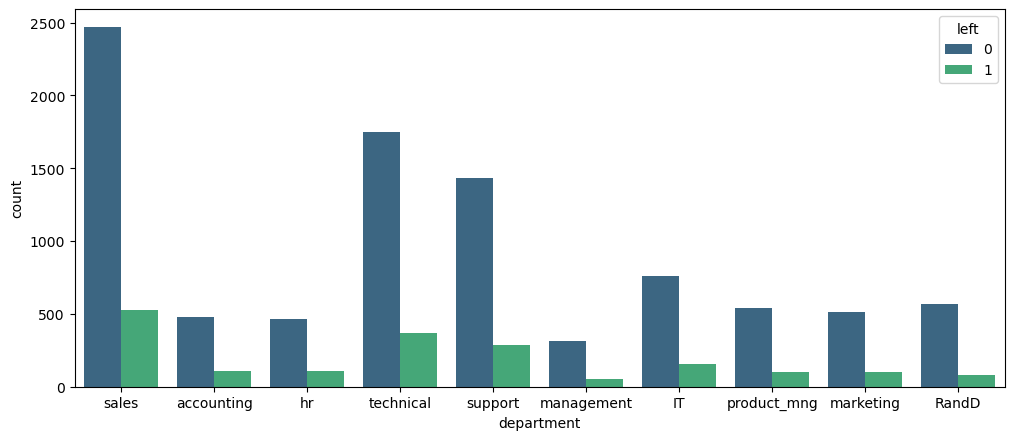

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12,5),dpi=100)
sns.countplot(data=df0,x='department',hue='left',palette='viridis');

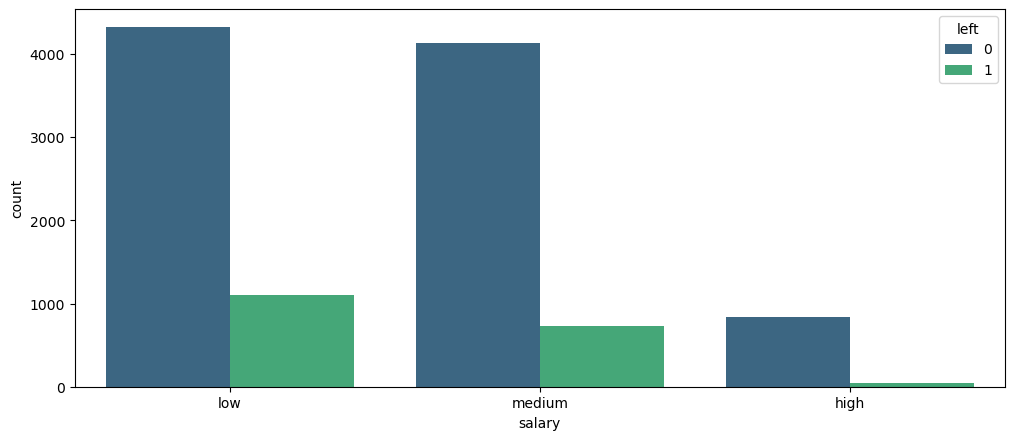

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12,5),dpi=100)
sns.countplot(data=df0,x='salary',hue='left',palette='viridis');

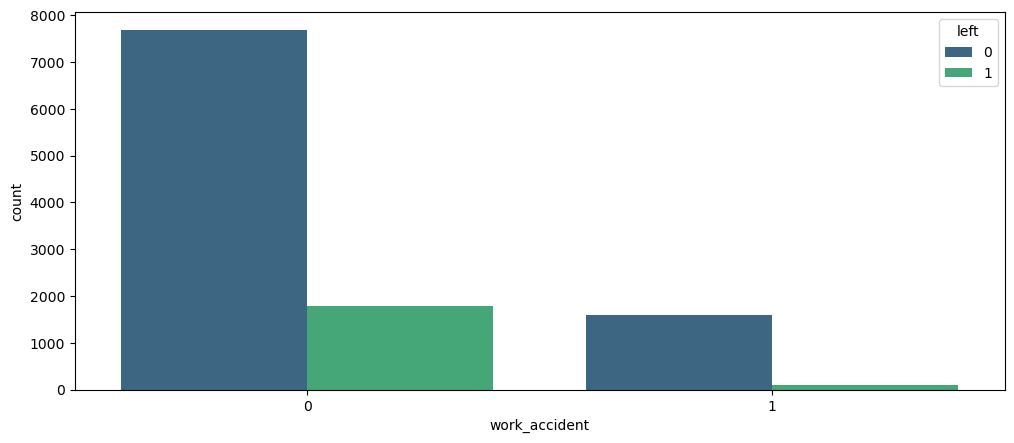

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12,5),dpi=100)
sns.countplot(data=df0,x='work_accident',hue='left',palette='viridis');

### Insights

- I see that some the data of some columns are skewed right.
- The percentage of value of zero for the columns are much more than value of one

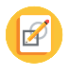
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



* Yes, there were outliers in the column of "time_spend_company", so I removed them.
- I choosed the column of "left" to be the indepent to test the retention of employees.
- Yes
- It will fit 0.7 of the data.
- May be not.
- https://rb.gy/fqxkr
- No

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task will be a result of the trained data.

### Identify the types of models most appropriate for this task.

Logistic Regression 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [25]:
# convert the salary to numeric data
df0[["low", "medium", "high"]] = pd.get_dummies(df0["salary"])
df0.head()

,satisfaction_level,last_evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,low,medium,high
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0
5,0.41,0.50,2,153,3,0,1,0,sales,low,0,1,0


In [26]:
# removing unwanted columns
df0 = df0.drop(["department", "salary", "medium"], axis=1)
df0.head()

,satisfaction_level,last_evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,low,high
0,0.38,0.53,2,157,3,0,1,0,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0


In [27]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11167 non-null  float64
 1   last_evaluation        11167 non-null  float64
 2   number_of_projects     11167 non-null  int64  
 3   average_montly_hours   11167 non-null  int64  
 4   time_spend_company     11167 non-null  int64  
 5   work_accident          11167 non-null  int64  
 6   left                   11167 non-null  int64  
 7   promotion_last_5years  11167 non-null  int64  
 8   low                    11167 non-null  uint8  
 9   high                   11167 non-null  uint8  
dtypes: float64(2), int64(6), uint8(2)
memory usage: 1.0 MB


In [28]:
# changing the data types of "low" & "high" columns
df0 = df0.astype({"low": "int", "high": "int"})
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11167 non-null  float64
 1   last_evaluation        11167 non-null  float64
 2   number_of_projects     11167 non-null  int64  
 3   average_montly_hours   11167 non-null  int64  
 4   time_spend_company     11167 non-null  int64  
 5   work_accident          11167 non-null  int64  
 6   left                   11167 non-null  int64  
 7   promotion_last_5years  11167 non-null  int64  
 8   low                    11167 non-null  int64  
 9   high                   11167 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.2 MB


In [29]:
# preparing the data for the model
X = df0.drop("left", axis=1)
y = df0["left"]

In [30]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((7816, 9), (7816,), (3351, 9), (3351,))

In [31]:
# fitting the model
model = LogisticRegression().fit(X_train, y_train)

In [32]:
# prediction stage
y_pred = model.predict(X_test)

In [33]:
# the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2762
           1       0.48      0.23      0.31       589

    accuracy                           0.82      3351
   macro avg       0.67      0.59      0.61      3351
weighted avg       0.79      0.82      0.79      3351



In [36]:
# the results of the confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[2612  150]
 [ 451  138]]


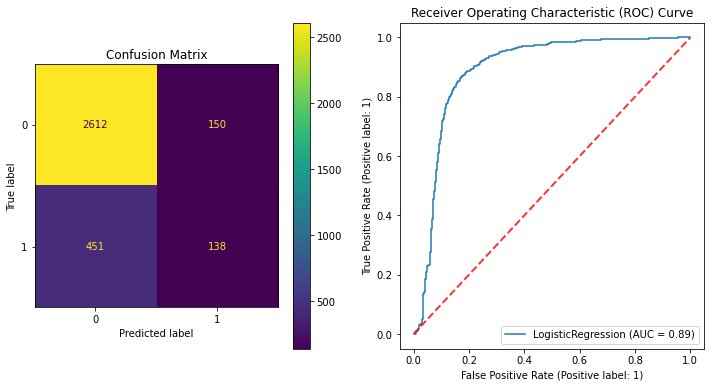

In [37]:
# Create subplots with custom figure size
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plot confusion matrix
plot_confusion_matrix(model, X_test, y_test, ax=ax1)  
ax1.set_title('Confusion Matrix')

# Plot ROC curve
plot_roc_curve(model, X_test, y_test, ax=ax2)  
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
ax2.set_title('Receiver Operating Characteristic (ROC) Curve')

plt.show()

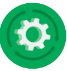
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- What business recommendations do you propose based on the models built?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



#### Key Insights:
- The model achieved an overall accuracy of 0.82, which means it correctly predicted the outcome of 82% of the cases in the test set.
- The model had a high precision (0.85) for the majority class (0), which means that when it predicted that a customer would not churn, it was correct 85% of the time.
- The model had a low precision (0.48) for the minority class (1), which means that when it predicted that a customer would churn, it was correct only 48% of the time.
- The model had a high recall (0.95) for the majority class (0), which means that it correctly identified 95% of the non-churning customers.
- The model had a low recall (0.23) for the minority class (1), which means that it missed identifying 77% of the customers who actually churned.
- The f1-score for the minority class (1) is only 0.31, which indicates poor performance in identifying customers who are likely to churn.

#### Business Recommendations:
- The model can be used to predict whether a customer is likely to churn or not, and businesses can use this information to proactively engage with customers who are at risk of churning.
- The high precision for the majority class (0) means that the model is good at identifying customers who are likely to stay, so businesses can focus their retention efforts on the minority class (1) where the model has lower precision and recall.
- Businesses can use the model to segment their customer base into those who are at low, medium, and high risk of churning, and tailor their retention strategies accordingly.
- The business can also use the insights from the model to improve its products and services, as well as its customer service, in order to address the issues that are causing customers to churn.

#### Recommendations for Improvement:
- Since the recall for the minority class (1) is low, the model is missing a significant number of customers who are likely to churn. To improve the performance of the model, the business can collect more data on the factors that influence customer churn and use this to train the model on a larger and more representative dataset.
- The business can also experiment with different machine learning algorithms, feature selection techniques, and hyperparameter tuning to improve the performance of the model.
- The model may also benefit from using more advanced techniques like ensemble learning or deep learning, depending on the complexity of the data.

#### Other Questions to Address:
- What are the main drivers of customer churn? Can we identify the key factors that influence customer retention and use this to develop targeted retention strategies?
- Are there differences in the factors that influence churn across different customer segments (e.g., age, gender, income, etc.)? Can we use this information to develop more personalized retention strategies?
- How does the cost of customer acquisition compare to the cost of customer retention? Can we use this information to develop a more effective retention strategy that balances the cost of retention with the value of retaining customers?